In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import kde

In [2]:
spiral_data = pd.read_table('http://cs.joensuu.fi/sipu/datasets/spiral.txt', 
                            header=None, names=['X','Y','Cluster'])

In [3]:
spiral_data.head()

,X,Y,Cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


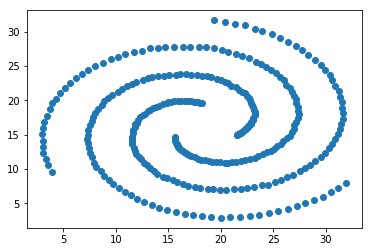

In [4]:
import matplotlib.pyplot as plt
plt.scatter(spiral_data['X'],spiral_data['Y'])

In [5]:
from sklearn.metrics import pairwise_distances

In [6]:
D = pairwise_distances(X=spiral_data[['X','Y']],n_jobs=-1) # Calculate pairwise distances

In [7]:
D.shape

(312, 312)

Text(0,0.5,'Densities')

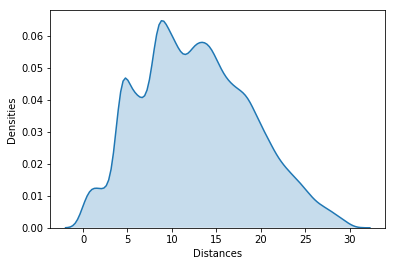

In [8]:
sns.kdeplot(data=D.flatten(),shade=True) # Look for the occurence of fist peak from the density plot
plt.xlabel("Distances")
plt.ylabel("Densities")

We nned to locate the value of distance for which the first peak has occurred. For that we need actual probability values for different distances.

In [9]:
Densities = kde.gaussian_kde(dataset=D.flatten()) # D is a 312 X 312 matrix which needs to be converted to 1D for density calculation

In [10]:
max(Densities(np.linspace(1,2,100))) # Find out the max probability between the distance value 1 and 2.
# Why 1 and 2, because it looks like the first peak is lying between 1 and 2

0.012461255791180587

In [11]:
(np.linspace(1,2,100))[Densities(np.linspace(1,2,100))==max(Densities(np.linspace(1,2,100)))]

array([1.37373737])

In [12]:
eps = 1.37

In [13]:
D1 = (D>0) & (D<eps) # For each point how many points are lying within its epsilon radius is required to be calculated

In [14]:
Pts = pd.DataFrame(D1).sum() # Pts holds how many points are lying within the epsilon neighborhood of each point

In [15]:
Pts.shape

(312,)

In [16]:
Pts.head()

0    1
1    2
2    2
3    2
4    2
dtype: int64

/home/subhasis/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


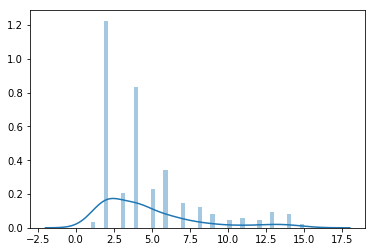

In [17]:
sns.distplot(a=Pts, bins=50)

Look for the point from which the the first steady rise in histogram is observed. In this case it is 1 (look at the density plot). Hence, 1 would be the desired minimum point parameter value. Keep in mind that these values (i.e. eps and minpts) are approximate values.

In [18]:
minpts = 1

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
dbs = DBSCAN(eps=eps, min_samples=minpts)

In [21]:
clus = dbs.fit_predict(spiral_data[['X','Y']])

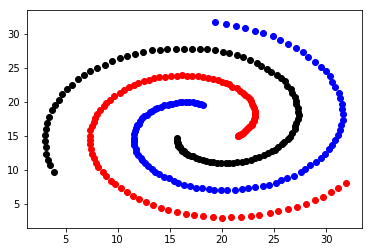

In [22]:
plt.scatter(spiral_data.iloc[clus==0,0],spiral_data.iloc[clus==0,1], c='red')
plt.scatter(spiral_data.iloc[clus==1,0],spiral_data.iloc[clus==1,1], c='blue')
plt.scatter(spiral_data.iloc[clus==2,0],spiral_data.iloc[clus==2,1], c='black')
plt.show()